In [1]:
import pandas as pd
import numpy as np

In [2]:
# Set display options
pd.set_option('display.max_columns', None)

df = pd.read_csv('/Users/apple/Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Dataset Information:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

**Initial Exploration**

In [3]:
print(f"Dataset shape: {df.shape}")

# Data types and missing values
df.info()

# Quick statistical summary
df.describe(include='all')


Dataset shape: (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.replace(" ", np.nan, inplace=True)
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [7]:
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


- For all new customers (tenure = 0), the TotalCharges hasn't accrued yet — hence it's missing or blank, making the value Null. 

- customers with missing TotalCharges all had tenure = 0, indicating they were brand new. Since they hadn’t received a bill yet, their churn behavior would not be meaningful for the model. Given they represented less than 0.2% of the dataset, I've chosen to drop them.

In [8]:
df = df[df['TotalCharges'].notnull()]
df.reset_index(drop=True, inplace=True)

In [9]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [10]:
# Gender: Male = 1, Female = 0
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

# Encode Yes/No columns
binary_cols = [
    'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies','MultipleLines','Churn'
]

for col in binary_cols:
    df[col] = df[col].replace({'Yes': 1, 'No': 0, 'No internet service': 0,'No phone service': 0})
    df[col] = df[col].astype(int)



/var/folders/5t/_csh3yjn4qq32mhl0bcbhc780000gn/T/ipykernel_6063/1736318448.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'Yes': 1, 'No': 0, 'No internet service': 0,'No phone service': 0})
/var/folders/5t/_csh3yjn4qq32mhl0bcbhc780000gn/T/ipykernel_6063/1736318448.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'Yes': 1, 'No': 0, 'No internet service': 0,'No phone service': 0})
/var/folders/5t/_csh3yjn4qq32mhl0bcbhc780000gn/T/ipykernel_6063/1736318448.py:12: FutureWa

In [11]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,1,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7028,2234-XADUH,0,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7029,4801-JZAZL,0,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7030,8361-LTMKD,1,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [12]:
df['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: count, dtype: int64

In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   int64  
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   int64  
 4   Dependents        7032 non-null   int64  
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   int64  
 7   MultipleLines     7032 non-null   int64  
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   int64  
 10  OnlineBackup      7032 non-null   int64  
 11  DeviceProtection  7032 non-null   int64  
 12  TechSupport       7032 non-null   int64  
 13  StreamingTV       7032 non-null   int64  
 14  StreamingMovies   7032 non-null   int64  
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   int64  


In [14]:
df.select_dtypes(include='object').nunique()


customerID         7032
InternetService       3
Contract              3
PaymentMethod         4
dtype: int64

In [15]:
multi_class_cols = ['InternetService', 'Contract', 'PaymentMethod']
for col in multi_class_cols:
    print(df[col].value_counts())
    print()


InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64

Contract
Month-to-month    3875
Two year          1685
One year          1472
Name: count, dtype: int64

PaymentMethod
Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: count, dtype: int64



In [16]:
df = pd.get_dummies(df, columns=multi_class_cols, drop_first=True)

In [17]:
df = df.astype({col: int for col in df.select_dtypes('bool').columns})

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7032 non-null   object 
 1   gender                                 7032 non-null   int64  
 2   SeniorCitizen                          7032 non-null   int64  
 3   Partner                                7032 non-null   int64  
 4   Dependents                             7032 non-null   int64  
 5   tenure                                 7032 non-null   int64  
 6   PhoneService                           7032 non-null   int64  
 7   MultipleLines                          7032 non-null   int64  
 8   OnlineSecurity                         7032 non-null   int64  
 9   OnlineBackup                           7032 non-null   int64  
 10  DeviceProtection                       7032 non-null   int64  
 11  Tech

**Exploratory Data Analysis (EDA)**

Churn
0    0.734215
1    0.265785
Name: proportion, dtype: float64


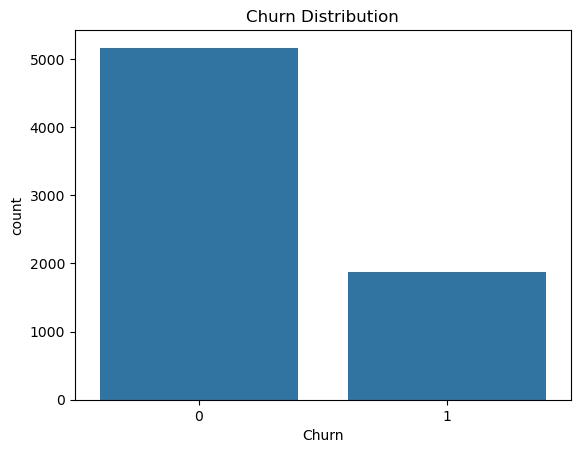

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

churn_rate = df['Churn'].value_counts(normalize=True) 
print(churn_rate)

sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()


**Observation** : Approximatel 1 in 4 customers left this month, which points to a major retention problem. Need to dig deeper to understand why

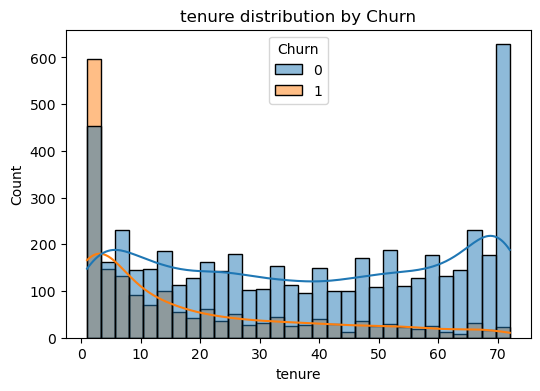

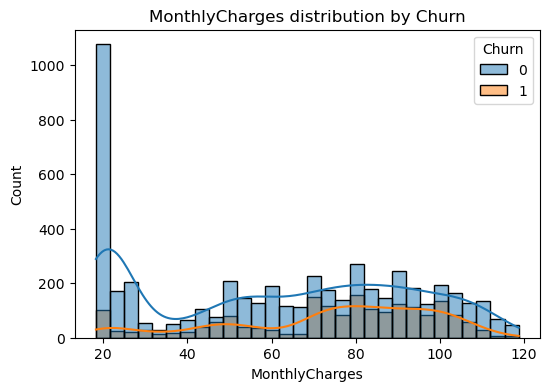

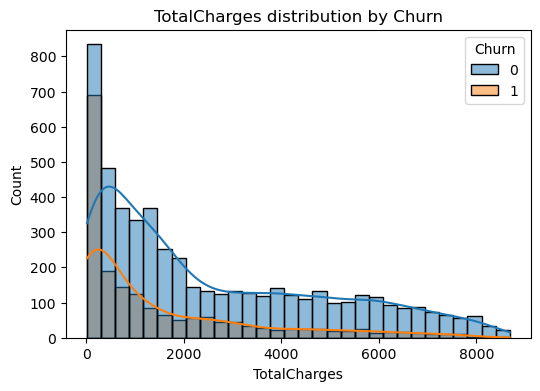

In [20]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, hue='Churn', bins=30, kde=True)
    plt.title(f'{col} distribution by Churn')
    plt.show()

Churn rate for Contract_One year:
Contract_One year
0    0.306295
1    0.112772
Name: Churn, dtype: float64



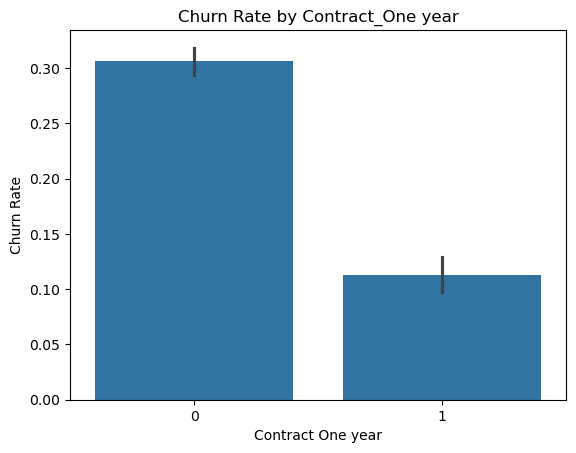

Churn rate for Contract_Two year:
Contract_Two year
0    0.340565
1    0.028487
Name: Churn, dtype: float64



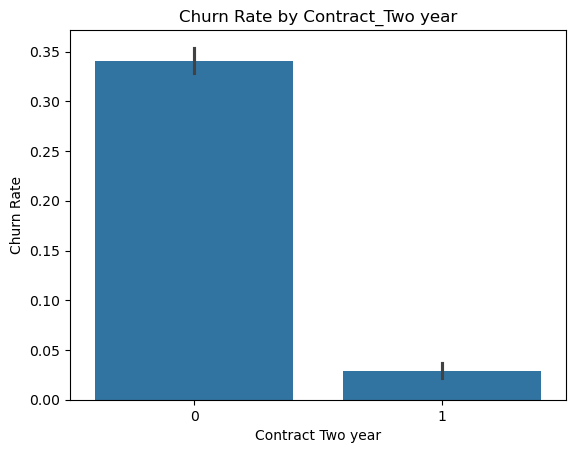

In [21]:
contract_cols = ['Contract_One year', 'Contract_Two year']

for col in contract_cols:
    churn_rate = df.groupby(col)['Churn'].mean()
    print(f"Churn rate for {col}:\n{churn_rate}\n")
    sns.barplot(x=col, y='Churn', data=df)
    plt.title(f'Churn Rate by {col}')
    plt.ylabel('Churn Rate')
    plt.xlabel(col.replace('_', ' '))
    plt.show()

Long-term contracts significantly reduce churn. Month-to-month customers are much more likely to leave suggesting that loyalty builds with commitment length. A smart retention strategy could incentivize month-to-month users to upgrade.


Churn rate for InternetService_Fiber optic:
InternetService_Fiber optic
0    0.145325
1    0.418928
Name: Churn, dtype: float64



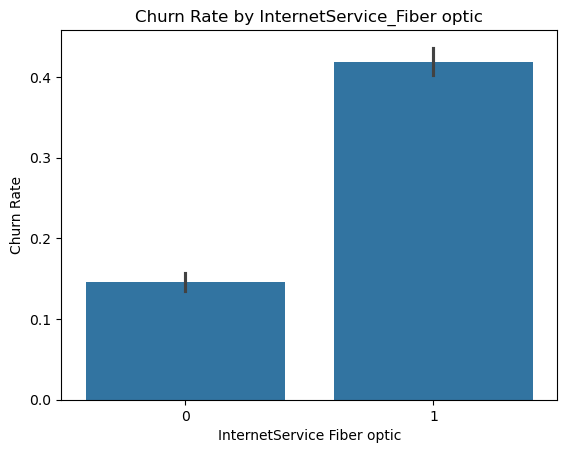

Churn rate for InternetService_No:
InternetService_No
0    0.318578
1    0.074342
Name: Churn, dtype: float64



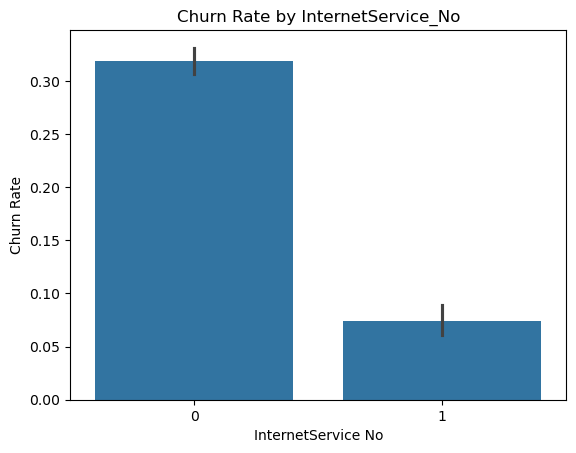

In [22]:
internet_cols = ['InternetService_Fiber optic', 'InternetService_No']

for col in internet_cols:
    churn_rate = df.groupby(col)['Churn'].mean()
    print(f"Churn rate for {col}:\n{churn_rate}\n")
    sns.barplot(x=col, y='Churn', data=df)
    plt.title(f'Churn Rate by {col}')
    plt.ylabel('Churn Rate')
    plt.xlabel(col.replace('_', ' '))
    plt.show()


Customers with fiber optic service churn the most — potentially due to performance issues, price sensitivity, or unmet expectations. Customers with no internet service are less likely to churn, likely because they’re on simpler/cheaper plans

Churn rate for PaymentMethod_Credit card (automatic):
PaymentMethod_Credit card (automatic)
0    0.297042
1    0.152531
Name: Churn, dtype: float64



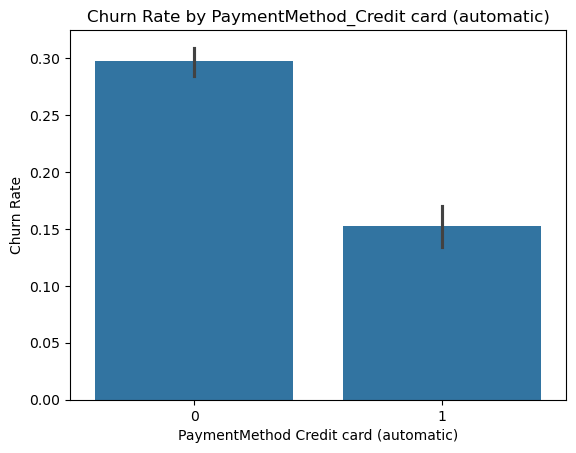

Churn rate for PaymentMethod_Electronic check:
PaymentMethod_Electronic check
0    0.170988
1    0.452854
Name: Churn, dtype: float64



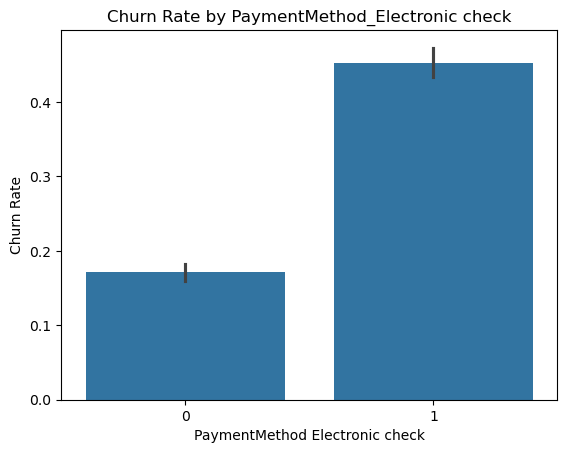

Churn rate for PaymentMethod_Mailed check:
PaymentMethod_Mailed check
0    0.287583
1    0.192020
Name: Churn, dtype: float64



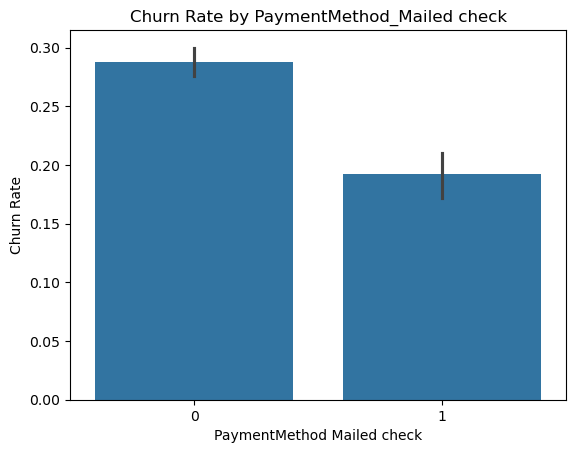

In [23]:
payment_cols = ['PaymentMethod_Credit card (automatic)',
                'PaymentMethod_Electronic check',
                'PaymentMethod_Mailed check']

for col in payment_cols:
    churn_rate = df.groupby(col)['Churn'].mean()
    print(f"Churn rate for {col}:\n{churn_rate}\n")
    sns.barplot(x=col, y='Churn', data=df)
    plt.title(f'Churn Rate by {col}')
    plt.ylabel('Churn Rate')
    plt.xlabel(col.replace('_', ' '))
    plt.show()


Customers paying via electronic check are highly likely to churn — possibly due to demographic or financial constraints. Those using credit card auto-pay are the most stable, perhaps due to set-and-forget convenience or stronger engagement

insights:

Incentivize long-term contracts (reduce churn from 34% → ~3%)

Target fiber optic users with satisfaction surveys or plan upgrades

Encourage credit card auto-pay setup to stabilize billing and reduce friction

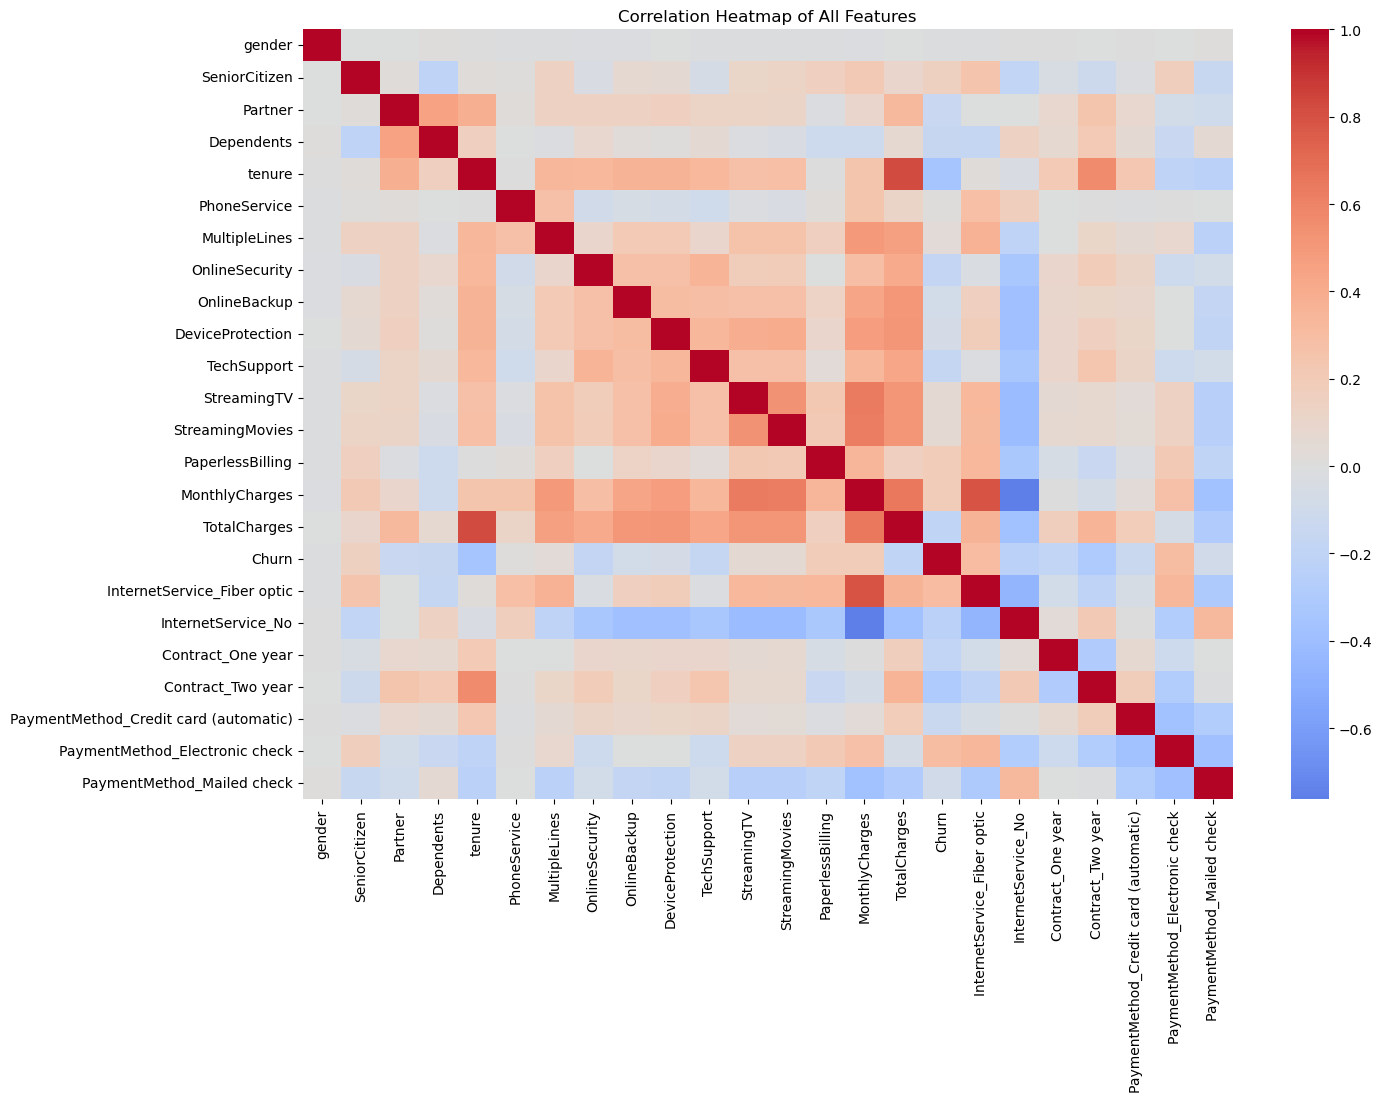

In [29]:
df_corr = df.drop(columns=['customerID'])
corr_matrix = df_corr.corr()

# Focus only on correlations with target (Churn)
churn_corr = corr_matrix['Churn'].sort_values(ascending=False)
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of All Features')
plt.show()

In [30]:
def tenure_bucket(tenure):
    if tenure <= 6:
        return '0–6 months'
    elif tenure <= 12:
        return '7–12 months'
    elif tenure <= 24:
        return '13–24 months'
    elif tenure <= 48:
        return '25–48 months'
    elif tenure <= 60:
        return '49–60 months'
    else:
        return '60+ months'

df['tenure_bucket'] = df['tenure'].apply(tenure_bucket)

In [31]:
df = pd.get_dummies(df, columns=['tenure_bucket'], drop_first=True)

In [32]:
df['AvgCharges'] = df['TotalCharges'] / (df['tenure'] + 1)

In [33]:
df.drop(columns=['customerID'], inplace=True)

In [34]:
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [35]:
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (5625, 29), Test shape: (1407, 29)


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

logreg = LogisticRegression(max_iter=1000)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)[:, 1]

In [37]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba):.4f}")


Confusion Matrix:
[[920 113]
 [172 202]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1033
           1       0.64      0.54      0.59       374

    accuracy                           0.80      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.79      0.80      0.79      1407

ROC AUC Score: 0.8388


In [38]:
pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 546.5/546.5 kB 2.1 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [41]:
import shap
explainer = shap.LinearExplainer(logreg, X_train, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_test)


/Users/apple/anaconda3/lib/python3.10/site-packages/shap/explainers/_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


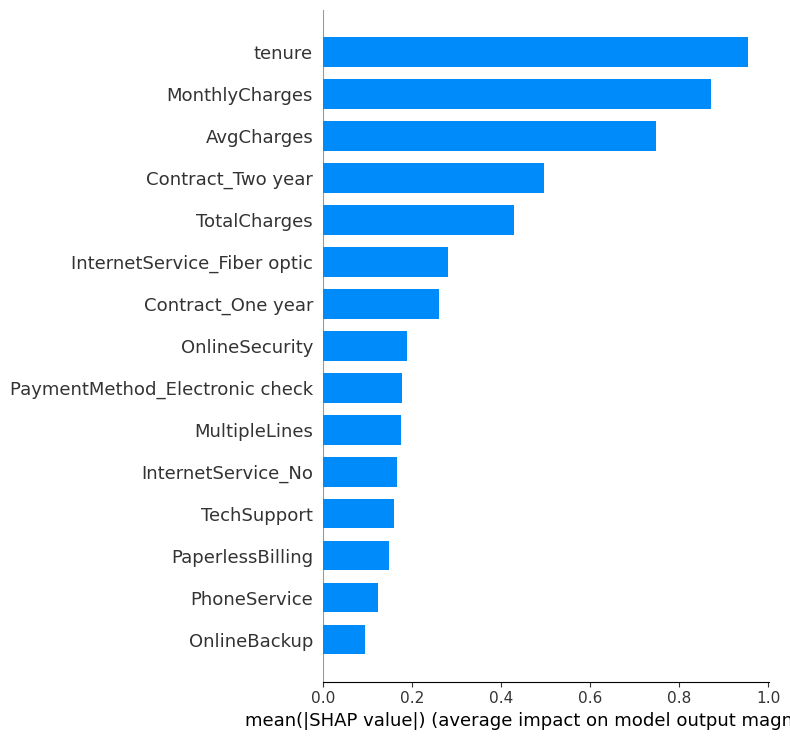

In [43]:
# Summary bar plot
shap.summary_plot(shap_values, X_test, plot_type="bar", max_display=15)

Encourage longer contracts — especially two-year — to significantly reduce churn.

Reduce MonthlyCharges for high-risk segments or offer discounts in early tenure.

New users (<6 months) should receive onboarding support — tenure is the strongest churn signal.

Encourage auto-pay methods like credit card over electronic check.

Bundled services with OnlineSecurity or TechSupport may help retain customers.

In [44]:
pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 4.7 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [45]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Instantiate and train
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

/Users/apple/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [16:19:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [46]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba_xgb):.4f}")


Confusion Matrix:
[[901 132]
 [175 199]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1033
           1       0.60      0.53      0.56       374

    accuracy                           0.78      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.77      0.78      0.78      1407

ROC AUC Score: 0.8198


goal now: Maximizing recall (even at a cost to precision) and improving F1-score for class 1



In [47]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [100, 200],
    'scale_pos_weight': [1, 2, 3]  # Try this to balance class 1
}

grid_search = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
                           param_grid, cv=3, scoring='recall', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best params:", grid_search.best_params_)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


/Users/apple/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [16:21:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/apple/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [16:21:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/apple/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [16:21:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/apple/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [16:21:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.



/Users/apple/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [16:21:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/apple/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [16:21:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/apple/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [16:21:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/apple/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [16:21:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.



/Users/apple/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [16:21:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/apple/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [16:21:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/apple/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [16:21:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/apple/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [16:21:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.



/Users/apple/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [16:21:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/apple/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [16:21:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/apple/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [16:21:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/apple/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [16:21:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.



/Users/apple/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [16:21:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/apple/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [16:21:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/apple/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [16:21:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/apple/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [16:21:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.



Best params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'scale_pos_weight': 3}


/Users/apple/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [16:21:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [48]:
xgb_tuned = XGBClassifier(
    learning_rate=0.05,
    max_depth=3,
    n_estimators=100,
    scale_pos_weight=3,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_tuned.fit(X_train, y_train)

# Get probabilities
y_proba_tuned = xgb_tuned.predict_proba(X_test)[:, 1]


/Users/apple/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [16:23:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


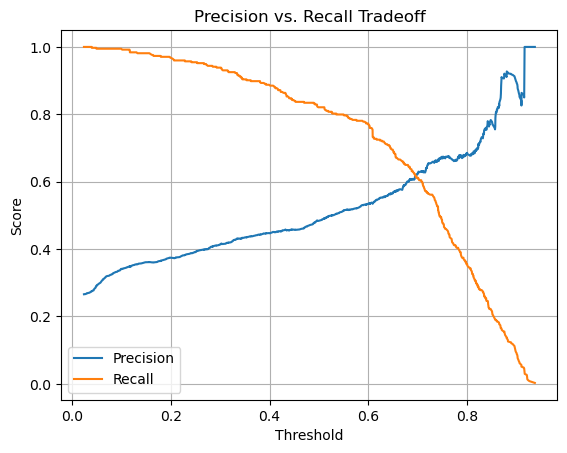

In [50]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba_tuned)

plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision vs. Recall Tradeoff")
plt.legend()
plt.grid()
plt.show()


In [51]:
threshold = 0.35
y_pred_thresh = (y_proba_tuned >= threshold).astype(int)

from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_thresh))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_thresh))

Confusion Matrix:
[[594 439]
 [ 36 338]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.58      0.71      1033
           1       0.44      0.90      0.59       374

    accuracy                           0.66      1407
   macro avg       0.69      0.74      0.65      1407
weighted avg       0.81      0.66      0.68      1407



In [52]:
explainer_xgb = shap.TreeExplainer(xgb_tuned)

# Calculate SHAP values for the test set
shap_values_xgb = explainer_xgb.shap_values(X_test)


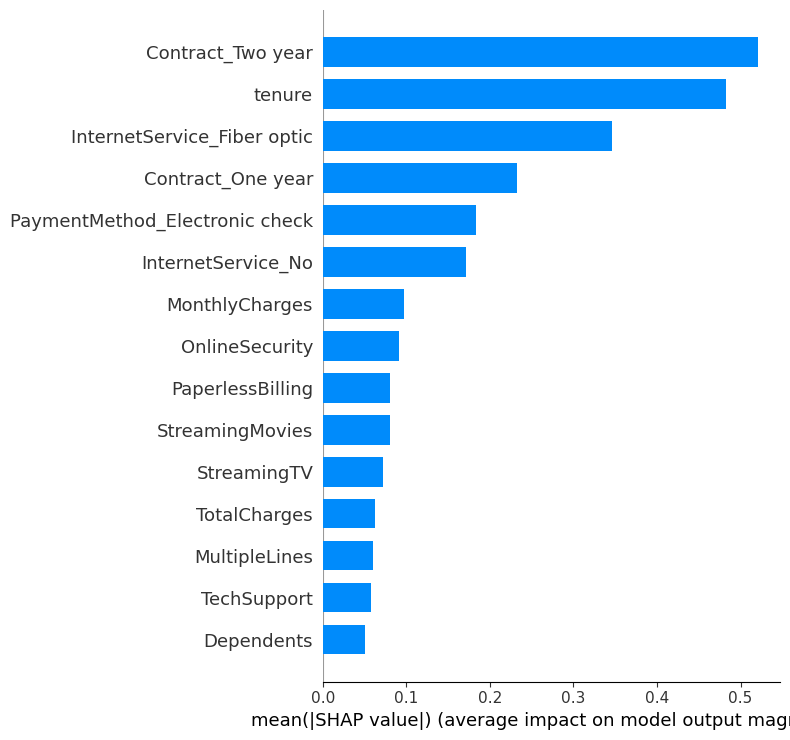

In [53]:
shap.summary_plot(shap_values_xgb, X_test, plot_type="bar", max_display=15)

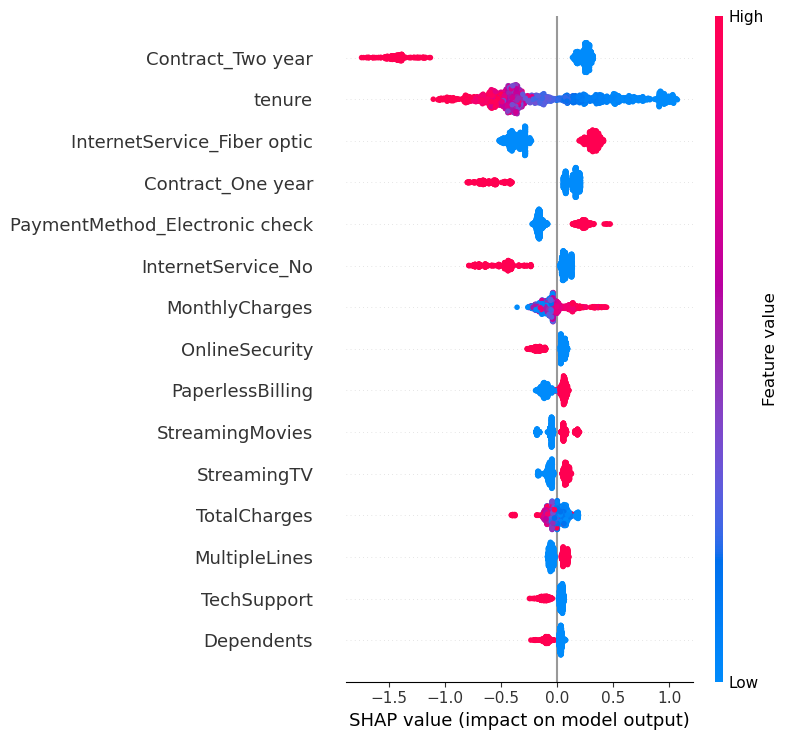

In [54]:
shap.summary_plot(shap_values_xgb, X_test, max_display=15)


Final Insights:

Offer incentives to convert month-to-month users to longer contracts — especially two-year.

Encourage auto-pay options over electronic checks — churn is lower among those users.

Investigate fiber optic service quality or pricing — it’s consistently associated with churn.

New users (low tenure) are at high risk — consider onboarding support or loyalty discounts

In [55]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 578.9 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 360.4 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.2/731.2 kB 788.7 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 663.0 kB/s eta 0:00:0000:0100:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.0/359.0 kB 891.3 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [61]:
import joblib

# Save the tuned XGBoost model
joblib.dump(xgb_tuned, 'xgb_churn_model.pkl')
joblib.dump(X_train.columns.tolist(), 'feature_list.pkl')


['feature_list.pkl']

2025-06-09 16:42:02.146 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-09 16:42:02.147 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-09 16:42:02.148 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-09 16:42:02.149 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-09 16:42:02.149 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-09 16:42:02.150 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-09 16:42:02.151 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-09 16:42:02.151 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

2025-06-09 16:42:02.180 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-09 16:42:02.180 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-09 16:42:02.181 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-09 16:42:02.181 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-09 16:42:02.182 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-09 16:42:02.182 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-09 16:42:02.182 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-09 16:42:02.183 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

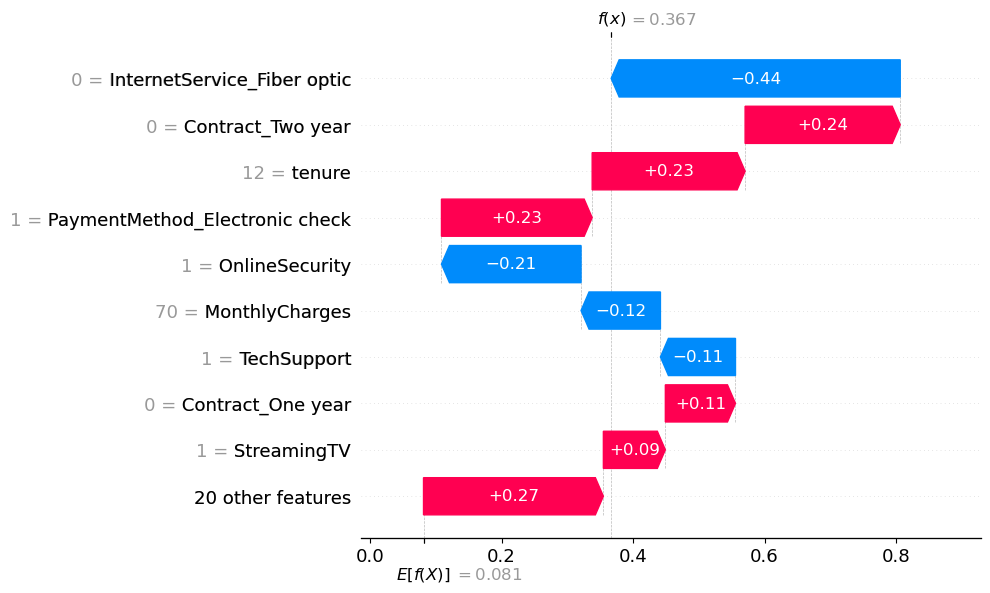

In [62]:
import streamlit as st
import pandas as pd
import joblib
import shap
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

model = joblib.load('xgb_churn_model.pkl')
feature_list = joblib.load('feature_list.pkl')

st.set_page_config(page_title="Customer Churn Predictor", layout="centered")
st.title("🔮 Customer Churn Prediction Dashboard")

st.sidebar.header("📋 Customer Information")

def get_user_input():
    # Basic Demographics
    gender = st.sidebar.selectbox("Gender", ["Male", "Female"])
    senior = st.sidebar.selectbox("Senior Citizen", ["No", "Yes"])
    partner = st.sidebar.selectbox("Has Partner", ["No", "Yes"])
    dependents = st.sidebar.selectbox("Has Dependents", ["No", "Yes"])

    # Account Info
    tenure = st.sidebar.slider("Tenure (months)", 0, 72, 12)
    monthly = st.sidebar.slider("Monthly Charges", 20, 120, 70)
    total = st.sidebar.slider("Total Charges", 0, 9000, 1000)
    contract = st.sidebar.selectbox("Contract", ["Month-to-month", "One year", "Two year"])
    payment = st.sidebar.selectbox("Payment Method", [
        "Electronic check", "Mailed check",
        "Credit card (automatic)", "Bank transfer (automatic)"
    ])
    paperless = st.sidebar.selectbox("Paperless Billing", ["Yes", "No"])

    # Services
    internet = st.sidebar.selectbox("Internet Service", ["DSL", "Fiber optic", "No"])
    online_sec = st.sidebar.selectbox("Online Security", ["Yes", "No", "No internet service"])
    online_bkp = st.sidebar.selectbox("Online Backup", ["Yes", "No", "No internet service"])
    device_protect = st.sidebar.selectbox("Device Protection", ["Yes", "No", "No internet service"])
    tech_support = st.sidebar.selectbox("Tech Support", ["Yes", "No", "No internet service"])
    streaming_tv = st.sidebar.selectbox("Streaming TV", ["Yes", "No", "No internet service"])
    streaming_movies = st.sidebar.selectbox("Streaming Movies", ["Yes", "No", "No internet service"])
    phone_service = st.sidebar.selectbox("Phone Service", ["Yes", "No"])
    multiple_lines = st.sidebar.selectbox("Multiple Lines", ["Yes", "No", "No phone service"])

    # Derived features
    avg_charges = total / (tenure + 1)

    raw_input = {
        'gender': 1 if gender == 'Male' else 0,
        'SeniorCitizen': 1 if senior == 'Yes' else 0,
        'Partner': 1 if partner == 'Yes' else 0,
        'Dependents': 1 if dependents == 'Yes' else 0,
        'tenure': tenure,
        'PhoneService': 1 if phone_service == 'Yes' else 0,
        'MultipleLines': 1 if multiple_lines == 'Yes' else 0,
        'OnlineSecurity': 1 if online_sec == 'Yes' else 0,
        'OnlineBackup': 1 if online_bkp == 'Yes' else 0,
        'DeviceProtection': 1 if device_protect == 'Yes' else 0,
        'TechSupport': 1 if tech_support == 'Yes' else 0,
        'StreamingTV': 1 if streaming_tv == 'Yes' else 0,
        'StreamingMovies': 1 if streaming_movies == 'Yes' else 0,
        'PaperlessBilling': 1 if paperless == 'Yes' else 0,
        'MonthlyCharges': monthly,
        'TotalCharges': total,
        'InternetService_Fiber optic': 1 if internet == 'Fiber optic' else 0,
        'InternetService_No': 1 if internet == 'No' else 0,
        'Contract_One year': 1 if contract == 'One year' else 0,
        'Contract_Two year': 1 if contract == 'Two year' else 0,
        'PaymentMethod_Credit card (automatic)': 1 if payment == 'Credit card (automatic)' else 0,
        'PaymentMethod_Electronic check': 1 if payment == 'Electronic check' else 0,
        'PaymentMethod_Mailed check': 1 if payment == 'Mailed check' else 0,
        'tenure_bucket_7–12 months': 1 if 7 <= tenure <= 12 else 0,
        'tenure_bucket_13–24 months': 1 if 13 <= tenure <= 24 else 0,
        'tenure_bucket_25–48 months': 1 if 25 <= tenure <= 48 else 0,
        'tenure_bucket_49–60 months': 1 if 49 <= tenure <= 60 else 0,
        'tenure_bucket_60+ months': 1 if tenure > 60 else 0,
        'AvgCharges': avg_charges
    }

    # Create input row and align with model's expected columns
    input_df = pd.DataFrame([raw_input])
    input_df = input_df.reindex(columns=feature_list, fill_value=0)

    return input_df

# Get input
input_data = get_user_input()

# Predict churn probability
prob = model.predict_proba(input_data)[0][1]
st.subheader(f"📈 Predicted Churn Probability: {prob:.2%}")

# SHAP explanation
explainer = shap.Explainer(model)
shap_values = explainer(input_data)

st.subheader("🧠 Why this prediction?")
fig, ax = plt.subplots(figsize=(10, 4))
shap.plots.waterfall(shap_values[0], max_display=10, show=False)
st.pyplot(fig)

st.markdown("---")
st.caption("Built with ❤️ using Streamlit and SHAP")

In [63]:
streamlit run app.py

SyntaxError: invalid syntax (507122745.py, line 1)